In [1]:
# import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
# variables and spesific parameters and constants
basic_breathing_factor_dict = [
    {"mean": {"16-31": 1.2e-02}},
    {"percentile":{"16-31": 1.6e-02}}
]
relative_breathing_factor_16_31 = (basic_breathing_factor_dict[1]["percentile"]["16-31"]* 60) / (basic_breathing_factor_dict[0]["mean"]["16-31"]* 60)
basic_quanta_exhalation_rate_listening = 1.0
quanta_exhalation_rate_speaking = 5.7
mask_efficiency = {"Keine Maske": 0, "FFP2 Maske ohne Anpassung":  1 - 0.532, "FFP2 Maske mit Anpassung": 1 - 0.125, "FFP2 Maske und chirurgische Maske": 1 - 0.209, "FFP2 Maske mit festhaltendem Band": 1 - 0.023, "chirurgische Maske": 1 - 0.76} # best case scenario
fraction_of_people_with_mask = 1
infected_people = 1
fraction_of_immune_people = 0.462
susceptible_people = {"11": (11 - infected_people) * (1 - fraction_of_immune_people), "21": (21 - infected_people) * (1 - fraction_of_immune_people), "31": (31 - infected_people) * (1 - fraction_of_immune_people)}
duration_of_event_minute = 45
duration_of_event_hour = duration_of_event_minute / 60
ventilation_with_outside_air = 3.8
virus_decay_rate = 0.63
deposition_of_the_surface = 0.9
additional_control_measures = 0
loss_rate = ventilation_with_outside_air + virus_decay_rate + deposition_of_the_surface + additional_control_measures
width_of_room = 5
length_of_room = 5
height_of_room = 3
volume_of_room = width_of_room * length_of_room * height_of_room

def infection_risk_parameter(relative_breathing_factor, relative_quanta_exhalation_rate, mask_efficiency, fraction_of_people_with_mask, duration_of_event_minute, duration_of_event_hour, susceptible_people, loss_rate, volume_of_room):
    return relative_breathing_factor * relative_quanta_exhalation_rate * ( 1 - mask_efficiency * fraction_of_people_with_mask ) - ( 1 - mask_efficiency * fraction_of_people_with_mask ) * duration_of_event_hour *  ((susceptible_people)/(loss_rate * volume_of_room)) * (1 - (1 - math.exp(-loss_rate * duration_of_event_minute))/(loss_rate * duration_of_event_minute))


In [3]:
out_b_array = []
out_qe_array = []
out_me_array = []
out_mp_array = []
out_th_array = []
out_tm_array = []
out_np_array = []
out_lr_array = []
out_v_array = []
out_risk_param_array = []
out_risk_state_array = []
out_rqer_reason_array = []
out_mask_type = []
for mask_efficiency_keys in mask_efficiency.keys():
    for susceptible_people_keys in susceptible_people.keys():
        relative_quanta_exhalation_rate_teacher_infected = quanta_exhalation_rate_speaking / basic_quanta_exhalation_rate_listening
        relative_quanta_exhalation_rate_student_infected = basic_quanta_exhalation_rate_listening / (((basic_quanta_exhalation_rate_listening * (susceptible_people[susceptible_people_keys] /(1-fraction_of_immune_people))) + (quanta_exhalation_rate_speaking)) / (susceptible_people[susceptible_people_keys] /(1-fraction_of_immune_people) + infected_people))
        relative_quanta_exhalation_dict = {}
        number_of_people = int(susceptible_people[susceptible_people_keys] / (1-fraction_of_immune_people) + infected_people)
        relative_quanta_exhalation_dict[f"Infizierte Schüler und {number_of_people} Personen im Raum"] = relative_quanta_exhalation_rate_student_infected
        relative_quanta_exhalation_dict[f"Infizierte Lehrer und {number_of_people} Personen im Raum"] = relative_quanta_exhalation_rate_teacher_infected
        for relative_quanta_exhalation_dict_keys in relative_quanta_exhalation_dict.keys():
            out_b_array.append(relative_breathing_factor_16_31)
            out_qe_array.append(relative_quanta_exhalation_dict[relative_quanta_exhalation_dict_keys])
            out_me_array.append(mask_efficiency[mask_efficiency_keys])
            out_mp_array.append(fraction_of_people_with_mask)
            out_tm_array.append(duration_of_event_minute)
            out_th_array.append(duration_of_event_hour)
            out_np_array.append(susceptible_people[susceptible_people_keys])
            out_lr_array.append(loss_rate)
            out_v_array.append(volume_of_room)
            out_rqer_reason_array.append(relative_quanta_exhalation_dict_keys)
            out_mask_type.append(mask_efficiency_keys)
            output = infection_risk_parameter(relative_breathing_factor_16_31, relative_quanta_exhalation_dict[relative_quanta_exhalation_dict_keys], mask_efficiency[mask_efficiency_keys], fraction_of_people_with_mask, duration_of_event_minute, duration_of_event_hour, susceptible_people[susceptible_people_keys], loss_rate,volume_of_room)
            out_risk_param_array.append(output)
            if output < 0.05:
                out_risk_state_array.append("Low")
            elif output <= 0.5:
                out_risk_state_array.append("Medium")
            elif output > 0.5:
                out_risk_state_array.append("High")

data = {"Relative Breathing Factor": out_b_array, "Relative quanta exhalation": out_qe_array,
"Exhalation mask efficiency": out_me_array, "Inhalation mask efficiency": out_me_array, "Fraction of people with mask" : out_mp_array, "Mask Type": out_mask_type,
"Time in Hour": out_th_array, "Time in Min": out_tm_array, "Number of susceptible people": out_np_array, "Setting": out_rqer_reason_array,
"Total first order loss": out_lr_array, "Volume": out_v_array, "Infection risk parameter": out_risk_param_array,
"Risk importance": out_risk_state_array}

df = pd.DataFrame(data)
df.to_excel(r"/home/theoguzhan/projects/JF Covid/Infection Risk Parameter.xlsx" ,index = False, header=True)
print(df)

    Relative Breathing Factor  Relative quanta exhalation  \
0                    1.333333                    0.700637   
1                    1.333333                    5.700000   
2                    1.333333                    0.817121   
3                    1.333333                    5.700000   
4                    1.333333                    0.868347   
5                    1.333333                    5.700000   
6                    1.333333                    0.700637   
7                    1.333333                    5.700000   
8                    1.333333                    0.817121   
9                    1.333333                    5.700000   
10                   1.333333                    0.868347   
11                   1.333333                    5.700000   
12                   1.333333                    0.700637   
13                   1.333333                    5.700000   
14                   1.333333                    0.817121   
15                   1.3

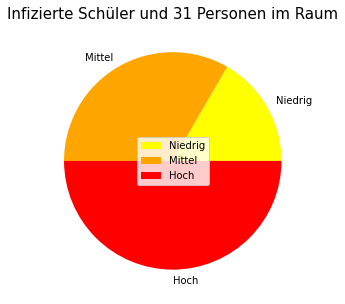

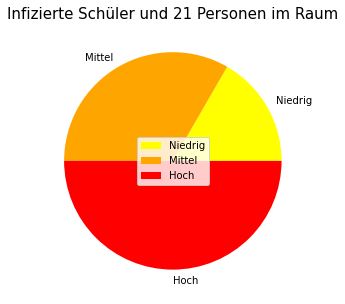

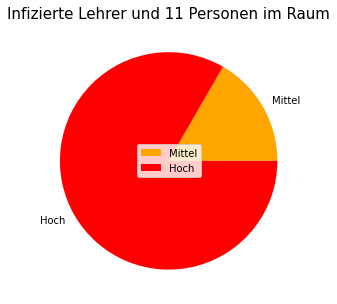

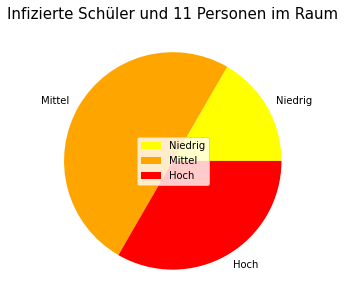

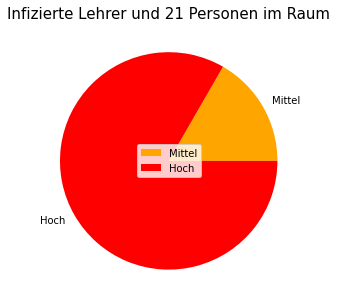

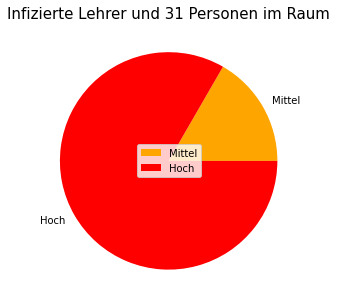

In [4]:
# relative quanta exhalation plotting
relative_quanta_exhalation_df = df.sort_values(by=["Setting", "Risk importance"])[["Setting","Risk importance"]]

relative_quanta_exhalation_df_dict = dict()

for relative_quanta_exhalation_df_item in set(relative_quanta_exhalation_df["Setting"].tolist()):
    relative_quanta_exhalation_df_dict[relative_quanta_exhalation_df_item] = {"Low": relative_quanta_exhalation_df.loc[(relative_quanta_exhalation_df["Setting"] == relative_quanta_exhalation_df_item) & (relative_quanta_exhalation_df["Risk importance"] == "Low")].groupby(by="Setting")["Risk importance"].count(), 
    "Medium": relative_quanta_exhalation_df.loc[(relative_quanta_exhalation_df["Setting"] == relative_quanta_exhalation_df_item) & (relative_quanta_exhalation_df["Risk importance"] == "Medium")].groupby(by="Setting")["Risk importance"].count(), 
    "High": relative_quanta_exhalation_df.loc[(relative_quanta_exhalation_df["Setting"] == relative_quanta_exhalation_df_item) & (relative_quanta_exhalation_df["Risk importance"] == "High")].groupby(by="Setting")["Risk importance"].count()}

# 
relative_quanta_exhalation_simple = dict()

for i in relative_quanta_exhalation_df_dict.keys():

    relative_quanta_exhalation_simple[i] = {"Niedrig":relative_quanta_exhalation_df_dict[i]["Low"].iloc[0] if len(relative_quanta_exhalation_df_dict[i]["Low"]) != 0 else 0,
    "Mittel":relative_quanta_exhalation_df_dict[i]["Medium"].iloc[0] if len(relative_quanta_exhalation_df_dict[i]["Medium"]) != 0 else 0, 
    "Hoch":relative_quanta_exhalation_df_dict[i]["High"].iloc[0] if len(relative_quanta_exhalation_df_dict[i]["High"]) != 0 else 0}





for relative_quanta_exhalation_simple_keys in enumerate(relative_quanta_exhalation_simple.keys()):
    plt.figure(relative_quanta_exhalation_simple_keys[0], figsize=(5,5))
    label_array = []
    value_array = []
    for i in relative_quanta_exhalation_simple[relative_quanta_exhalation_simple_keys[1]].keys():
        if relative_quanta_exhalation_simple[relative_quanta_exhalation_simple_keys[1]][i] != 0:
            value_array.append(relative_quanta_exhalation_simple[relative_quanta_exhalation_simple_keys[1]][i])
            label_array.append(i)
    colors = None
    if len(label_array) == 3:
        colors =["yellow", "orange", "red"]
    elif len(label_array) == 2 and "Niedrig" in label_array:
        colors = ["yellow", "orange"]
    elif len(label_array) == 2 and "Hoch" in label_array:
        colors = ["orange", "red"]
    elif len(label_array) == 1 and "Niedrig" in label_array:
        colors = ["yellow"]
    elif len(label_array) == 1 and "Mittel" in label_array:
        colors = ["orange"]
    elif len(label_array) == 1 and "Hoch" in label_array:
        colors = ["red"]
    plt.pie(value_array,  labels=label_array, colors=colors)
    plt.title(f"{relative_quanta_exhalation_simple_keys[1]}", size = 15)
    plt.legend(loc='center')
    plt.savefig(relative_quanta_exhalation_simple_keys[1].replace(".", ","))

plt.show()


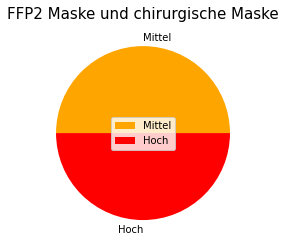

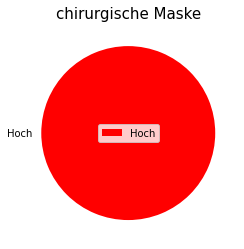

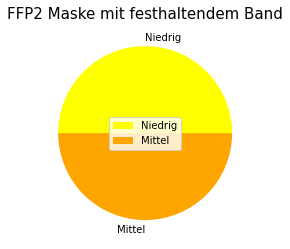

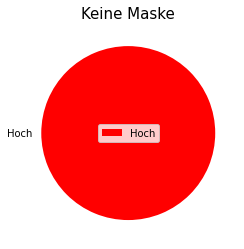

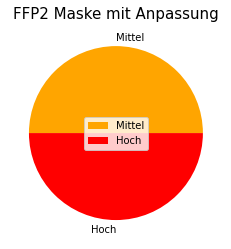

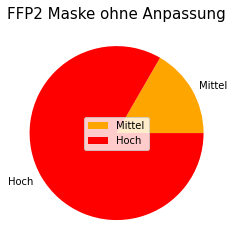

In [5]:
# Exhalation mask efficiency plotting
mask_efficiency_df = df.sort_values(by=["Mask Type", "Risk importance"])[["Mask Type","Risk importance"]]

mask_efficiency_df_dict = dict()

for mask_efficiency_df_item in set(mask_efficiency_df["Mask Type"].tolist()):
    mask_efficiency_df_dict[mask_efficiency_df_item] = {"Low": mask_efficiency_df.loc[(mask_efficiency_df["Mask Type"] == mask_efficiency_df_item) & (mask_efficiency_df["Risk importance"] == "Low")].groupby(by="Mask Type")["Risk importance"].count(), 
    "Medium": mask_efficiency_df.loc[(mask_efficiency_df["Mask Type"] == mask_efficiency_df_item) & (mask_efficiency_df["Risk importance"] == "Medium")].groupby(by="Mask Type")["Risk importance"].count(), 
    "High": mask_efficiency_df.loc[(mask_efficiency_df["Mask Type"] == mask_efficiency_df_item) & (mask_efficiency_df["Risk importance"] == "High")].groupby(by="Mask Type")["Risk importance"].count()}

# 
mask_efficiency_simple = dict()

for i in mask_efficiency_df_dict.keys():

    mask_efficiency_simple[i] = {"Niedrig":mask_efficiency_df_dict[i]["Low"].iloc[0] if len(mask_efficiency_df_dict[i]["Low"]) != 0 else 0,
    "Mittel":mask_efficiency_df_dict[i]["Medium"].iloc[0] if len(mask_efficiency_df_dict[i]["Medium"]) != 0 else 0, 
    "Hoch":mask_efficiency_df_dict[i]["High"].iloc[0] if len(mask_efficiency_df_dict[i]["High"]) != 0 else 0}





for mask_efficiency_simple_keys in enumerate(mask_efficiency_simple.keys()):
    plt.figure(mask_efficiency_simple_keys[0])
    label_array = []
    value_array = []
    for i in mask_efficiency_simple[mask_efficiency_simple_keys[1]].keys():
        if mask_efficiency_simple[mask_efficiency_simple_keys[1]][i] != 0:
            value_array.append(mask_efficiency_simple[mask_efficiency_simple_keys[1]][i])
            label_array.append(i)

    colors = None
    if len(label_array) == 3:
        colors =["yellow", "orange", "red"]
    elif len(label_array) == 2 and "Niedrig" in label_array:
        colors = ["yellow", "orange"]
    elif len(label_array) == 2 and "Hoch" in label_array:
        colors = ["orange", "red"]
    elif len(label_array) == 1 and "Niedrig" in label_array:
        colors = ["yellow"]
    elif len(label_array) == 1 and "Mittel" in label_array:
        colors = ["orange"]
    elif len(label_array) == 1 and "Hoch" in label_array:
        colors = ["red"]
    plt.pie(value_array,  labels=label_array, colors=colors)
    plt.title(f"{mask_efficiency_simple_keys[1]}", size = 15)
    plt.legend(loc='center')
    plt.savefig(mask_efficiency_simple_keys[1])

plt.show()


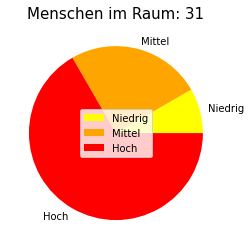

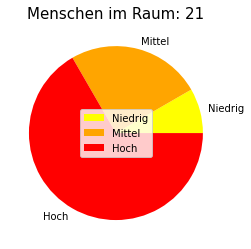

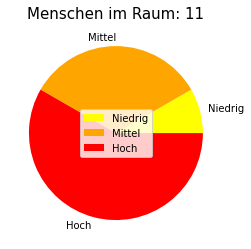

In [6]:
# Number of susceptible people plotting
number_of_people_df = df.sort_values(by=["Number of susceptible people", "Risk importance"])[["Number of susceptible people","Risk importance"]]

number_of_people_df_dict = dict()

for number_of_people_df_item in set(number_of_people_df["Number of susceptible people"].tolist()):
    number_of_people_df_dict[number_of_people_df_item] = {"Low": number_of_people_df.loc[(number_of_people_df["Number of susceptible people"] == number_of_people_df_item) & (number_of_people_df["Risk importance"] == "Low")].groupby(by="Number of susceptible people")["Risk importance"].count(), 
    "Medium": number_of_people_df.loc[(number_of_people_df["Number of susceptible people"] == number_of_people_df_item) & (number_of_people_df["Risk importance"] == "Medium")].groupby(by="Number of susceptible people")["Risk importance"].count(), 
    "High": number_of_people_df.loc[(number_of_people_df["Number of susceptible people"] == number_of_people_df_item) & (number_of_people_df["Risk importance"] == "High")].groupby(by="Number of susceptible people")["Risk importance"].count()}

# 
number_of_people_simple = dict()

for i in number_of_people_df_dict.keys():

    number_of_people_simple[i] = {"Niedrig":number_of_people_df_dict[i]["Low"].iloc[0] if len(number_of_people_df_dict[i]["Low"]) != 0 else 0,
    "Mittel":number_of_people_df_dict[i]["Medium"].iloc[0] if len(number_of_people_df_dict[i]["Medium"]) != 0 else 0, 
    "Hoch":number_of_people_df_dict[i]["High"].iloc[0] if len(number_of_people_df_dict[i]["High"]) != 0 else 0}





for number_of_people_simple_keys in enumerate(number_of_people_simple.keys()):
    plt.figure(number_of_people_simple_keys[0])
    label_array = []
    value_array = []
    for i in number_of_people_simple[number_of_people_simple_keys[1]].keys():
        if number_of_people_simple[number_of_people_simple_keys[1]][i] != 0:
            value_array.append(number_of_people_simple[number_of_people_simple_keys[1]][i])
            label_array.append(i)
    
    colors = None
    if len(label_array) == 3:
        colors =["yellow", "orange", "red"]
    elif len(label_array) == 2 and "Niedrig" in label_array:
        colors = ["yellow", "orange"]
    elif len(label_array) == 2 and "Hoch" in label_array:
        colors = ["orange", "red"]
    elif len(label_array) == 1 and "Niedrig" in label_array:
        colors = ["yellow"]
    elif len(label_array) == 1 and "Mittel" in label_array:
        colors = ["orange"]
    elif len(label_array) == 1 and "Hoch" in label_array:
        colors = ["red"]
    plt.pie(value_array,  labels=label_array, colors=colors)
    plt.title(f"Menschen im Raum: {int(number_of_people_simple_keys[1]/(1-fraction_of_immune_people) + infected_people)}", size = 15)
    plt.legend(loc='center')
    st = str(int(number_of_people_simple_keys[1]/(1-fraction_of_immune_people) + infected_people)).replace('.', ",")
    plt.savefig(f"Present People: {st}")

plt.show()
